# Offline Mode Interactive Plots

Interactive plots from datamapplot can be saved as HTML files for easy sharing. One catch is that the files refer to javascript dependencies and fonts that are provided by CDNs. This means that the generated HTML files will not work when offline, or behind strict firewalls. This can be problematic for users stuck in those situations. To remedy this datamapplot has support for an "offline mode" that embeds the relevant javascript and fonts directly into the HTML so the resulting output is fully independent and can be viewed offline or behind firewalls.

Of course to do this the relevant javascript and fonts need to be collected to be embedded. For this you will need an internet connection. To make this slightly easier a command-line tool is provided: ``dmp_offline_cache``. This will allow you to download and store the relevant data while connected to the internet, and then make use of the cached files for offline mode work thereafter. Let's have a look at the help for this tool:

In [1]:
!dmp_offline_cache --help

usage: dmp_offline_cache [-h] [--js_urls JS_URLS [JS_URLS ...]]
                         [--font_names FONT_NAMES [FONT_NAMES ...]]
                         [--refresh] [--js_cache_file JS_CACHE_FILE]
                         [--font_cache_file FONT_CACHE_FILE]

Cache JS and font files for offline mode

options:
  -h, --help            show this help message and exit
  --js_urls JS_URLS [JS_URLS ...]
                        CDN URLs to fetch and cache js from
  --font_names FONT_NAMES [FONT_NAMES ...]
                        Names of google font fonts to cache
  --refresh             Force refresh cached files
  --js_cache_file JS_CACHE_FILE
                        Path to save JS cache file
  --font_cache_file FONT_CACHE_FILE
                        Path to save font cache file


You can specify which javascripty files you wish to collect, which font names you wish to collect, and file paths of where to store the cache files. If these aren't specified default choices will be used that should cover most basic cases. There is also a ``--refresh`` option that will download the latest versions of javascript libraries and fonts to make sure you are up to date.

We can see what javascript and fonts will be collected, and where they will be cached by inspecting variables in the ``offline_mode_caching`` module:

In [2]:
import datamapplot.offline_mode_caching

The Javascriupt libraries cached by default are stored in the ``DEFAULT_URLS`` variable:

In [3]:
datamapplot.offline_mode_caching.DEFAULT_URLS

['https://unpkg.com/deck.gl@latest/dist.min.js',
 'https://unpkg.com/apache-arrow@latest/Arrow.es2015.min.js',
 'https://unpkg.com/d3@latest/dist/d3.min.js',
 'https://unpkg.com/jquery@3.7.1/dist/jquery.min.js',
 'https://unpkg.com/d3-cloud@1.2.7/build/d3.layout.cloud.js']

A selection of fonts that are good choices for interactive datamapplots are stored in ``BASE_FONTS``:

In [4]:
datamapplot.offline_mode_caching.BASE_FONTS

['Roboto',
 'Open Sans',
 'Montserrat',
 'Oswald',
 'Merriweather',
 'Merriweather Sans',
 'Playfair Display',
 'Playfair Display SC',
 'Roboto Condensed',
 'Ubuntu',
 'Cinzel',
 'Cormorant',
 'Cormorant SC',
 'Marcellus',
 'Marcellus SC',
 'Anton',
 'Anton SC',
 'Arsenal',
 'Arsenal SC',
 'Baskervville',
 'Baskervville SC',
 'Lora',
 'Quicksand',
 'Bebas Neue']

Finally you can see where the cache files will be stored by checking ``DEFAULT_CACHE_FILES``. Note that this is operating system dependent, so the files may have different locations if you are running on a Mac or Windows.

In [5]:
datamapplot.offline_mode_caching.DEFAULT_CACHE_FILES

{'javascript': '/home/lmmcinn/.local/share/datamapplot/datamapplot_js_encoded.json',
 'fonts': '/home/lmmcinn/.local/share/datamapplot/datamapplot_fonts_encoded.json'}

Now let's see an example of this in action. We will import datamapplot and load up some data suitable for making an interactive plot.

In [6]:
import datamapplot
import numpy as np
import requests
import io

base_url = "https://github.com/TutteInstitute/datamapplot"
data_map_file = requests.get(
    f"{base_url}/raw/main/examples/arxiv_ml_data_map.npy"
)
arxivml_data_map = np.load(io.BytesIO(data_map_file.content))
arxivml_label_layers = []
for layer_num in range(5):
    label_file = requests.get(
        f"{base_url}/raw/interactive/examples/arxiv_ml_layer{layer_num}_cluster_labels.npy"
    )
    arxivml_label_layers.append(np.load(io.BytesIO(label_file.content), allow_pickle=True))
hover_data_file = requests.get(
    f"{base_url}/raw/interactive/examples/arxiv_ml_hover_data.npy"
)
arxiv_hover_data = np.load(io.BytesIO(hover_data_file.content), allow_pickle=True)

Now we make a plot exactly as we normally would, but include the extra keyword argument ``offline_mode=True``. If you have stored your cache files somewhere other than the default location you can specify these via ``offline_mode_js_data_file`` and ``offline_mode_font_data_file``. It is worth noting that if you haven't run ``dmp_offline_cache`` on the command line, or the relevant files in the default location don't yet exist, they will be created for you.

<InteractiveFigure width=100% height=800>
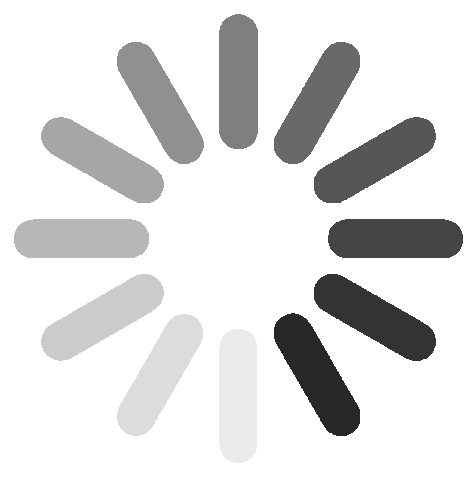

In [7]:
plot = datamapplot.create_interactive_plot(
    arxivml_data_map,
    arxivml_label_layers[0],
    arxivml_label_layers[2],
    arxivml_label_layers[4],
    hover_text = arxiv_hover_data,
    font_family="Cormorant SC",
    title="ArXiv Machine Learning Landscape",
    sub_title="A data map of papers from the Machine Learning section of ArXiv",
    logo="https://upload.wikimedia.org/wikipedia/commons/thumb/b/bc/ArXiv_logo_2022.svg/512px-ArXiv_logo_2022.svg.png",
    logo_width=180,
    on_click="window.open(`http://google.com/search?q=\"{hover_text}\"`)",
    enable_search=True,
    darkmode=True,
    offline_mode=True,
)
plot

You can now save the resulting file and have an interactive plot that works offline and behind firewalls.

In [8]:
plot.save("arxiv_ml_offline_mode.html")

Equally, if you need to work behind a firewall you can use ``dmp_offline_cache`` to create cache files when outside the firewall and get the resulting files transferred inside the firewall and run successfully as long as you use ``offline_mode=True``.